Enter a month to be analyzed [1-12]: 3


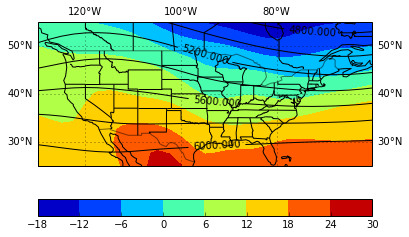

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import numpy as np
import cartopy
import cartopy.crs as ccrs
import netCDF4

def tempheight(month):
    nca = netCDF4.Dataset("air.mon.ltm.nc", "r")
    nch = netCDF4.Dataset("hgt.mon.ltm.nc", "r")
    
    #grabbing latitude and longitude data...
    lon_data = nca.variables["lon"][:]
    lat_data = nca.variables["lat"][:]
    
    #month_index, level_index, lat_indices, lon_indices
    air_data = nca.variables["air"][month,0,14:27,92:121]
    
    #month_index, hgt_index, lat_indices, lon_indices
    hgt_data = nch.variables["hgt"][month,5,14:27,92:121]
    
    #Make the map
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([-130,-60,25,55],crs=ccrs.PlateCarree())
    states_provinces = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces)
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    
    #add Longitude and Latitude Lines
    gl = ax.gridlines(draw_labels=True)
    gl.xlocator = mticker.FixedLocator([-140, -120, -100, -80, -60])
    gl.ylocator = mticker.FixedLocator([20, 30, 40, 50, 60])
    gl.xlabels_bottom = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    
    #add contour lines and colorbar
    plt.contourf(lon_data[92:121], lat_data[14:27], air_data,
            projection=ccrs.PlateCarree())
    plt.colorbar(orientation='horizontal') #must be called between plt.contourf and plt.contour
    contours = plt.contour(lon_data[92:121], lat_data[14:27], hgt_data,
            projection=ccrs.PlateCarree(), colors='k')
    #********************************
    #code obtained from http://matplotlib.org/examples/pylab_examples/contour_label_demo.html
    fmt = {}
    strs = ['4800.000', '5000.000', '5200.000', '5400.000', '5600.000', '5800.000', '6000.000', '6200.000', '6400.000']
    for l, s in zip(contours.levels, strs):
        fmt[l] = s

    # Label every other level using strings
    plt.clabel(contours, contours.levels[::2], inline=True, fmt=fmt, fontsize=10)
    #********************************
    
month = float(raw_input("Enter a month to be analyzed [1-12]: "))
tempheight(month-1)